<a href="https://colab.research.google.com/github/ehabsameh/Final_Project/blob/main/SnapChat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group Members
## Ehab Abdo
eabdo@calpoly.edu
## Greg Larmour
glarmour@calpoly.edu
## Harrison Pearce
hlpearce@calpoly.edu
 
GSB 521 - Pierce
 
16 March 2023

# Introduction

# Data Importation

In [ ]:
# !pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  error: subprocess-exited-with-error
  
  × Running setup.py install for fbprophet did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for fbprophet ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> fbprophet

note: This is an issue with the package mentioned above, not pip.
hint: See

In [ ]:
#import needed packages
# !pip install pyjanitor==0.23.1
import pandas as pd
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
import plotly.express as px
from urllib import request
import json
import numpy as np
import seaborn as sns
import janitor
import datetime
import statsmodels.api as sm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, LabelSet
import plotly.graph_objects as go
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.transform import transform
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go
# from fbprophet import Prophet

pd.options.display.max_columns = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/AWS_Final_Project/usage_pre_covid_nordic.csv'
snap = pd.read_csv(path)

snapA = snap.groupby('event_date')['APP_APPLICATION_OPEN_UU'].sum().reset_index()

# Question1 : What will the average Q1'2020 DAU be?


  The provided SnapChat DAU for nordic countries included around 9 days after the lockdown in Norway and Denmark which took place between March 12th and March 13th, 2020.
  Looking at closely at the 9 days impacted by covid-19 we can safely assume that the increasing DAU trend will keep ramping up with similar pace till end of Q1

In [ ]:
#####  prophet model1 preparation

# preparing training data
train_data = snap.groupby('event_date')['APP_APPLICATION_OPEN_UU'].sum().reset_index().rename(columns={'event_date': 'ds', 'APP_APPLICATION_OPEN_UU': 'y'})
train_data['ds'] = pd.to_datetime(train_data['ds'])

# pre and post covid seasonality
train_data = train_data.copy()
train_data['pre_covid'] = pd.to_datetime(train_data['ds']) < pd.to_datetime('2020-03-13')
train_data['post_covid'] = ~train_data['pre_covid']

# lockdown period to be treated as holidays
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-13', 'lower_window': 0, 'ds_upper': '2020-05-29'}])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days

In [ ]:
##### Model1

# Select certain number of historical days to use for training
#train_data = train_data[train_data['ds'] > train_data['ds'].max() - pd.Timedelta(days=40)]

# design model
m1 = Prophet(
   changepoint_prior_scale=1,
   n_changepoints=10,
   seasonality_prior_scale = 5,
   holidays = lockdowns,
   yearly_seasonality= True,
   seasonality_mode = 'multiplicative',
#  changepoints=['2020-03-13'],
#  weekly_seasonality=False,
)
m1.add_seasonality(name='weekly_pre_covid', period=7, fourier_order=3, condition_name='pre_covid',)
m1.add_seasonality(name='weekly_post_covid',period=7,fourier_order=3,condition_name='post_covid',)

# fit model
m1 = m1.fit(train_data)
future1 = m1.make_future_dataframe(periods=10)
future1['pre_covid'] = pd.to_datetime(future1['ds']) < pd.to_datetime('2020-03-13')
future1['post_covid'] = ~future1['pre_covid']

# predict
forecast1 = m1.predict(future1)

# forecast plot
plot_plotly(m1, forecast1)

#plot_components_plotly(m1, forecast1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
##### Q4 DAU Forecast

In [ ]:
##### Q1 DAU Forecast

# Q1 actual data
start_date = '2020-1-1'
end_date = '2020-3-21'
Q1_actual = train_data.loc[start_date:end_date, 'y'].sum()
Q1_actual
# Q1 forecasted 
start_date = '2020-3-22'
end_date = '2020-3-31'
Q1_forecasted = forecast1.loc[start_date:end_date, 'yhat'].sum()
Q1_forecasted

Q1_Sum_DAU = Q1_actual + Q1_forecasted
Q1_Avg_DAU = Q1_Total/91
Q1_Avg_DAU

6922287.542834127

In [ ]:
Q1_Total

629928166.3979056

# Question 2: What range will you forecast for average Q2'2020 DAU?

## Approach and External Data

To realize Q2 forecast we wanted to collect some external data that can be used as proxy for snapchat DAU evolution behavior to help us design and validate our forecasting model, we wanted to find some relevant data to answer below two questions

**First: Estimated month-over-month DAU increase**

We wanted to find other proxy variables with some daily, monthly or quarterly data available for nordic countries to be used for our model results validation and tuning, given we have only 9 days that were impacted by the covid-19 lock down in the provided data set. We found the Netflix DAU data for nordic countries might be a good proxy for snapchat
fig1 is showing the netflix DAU trend in Denmark, with similar trend observed for norway as well.






*Netflix Monthly DAU in Denmark*

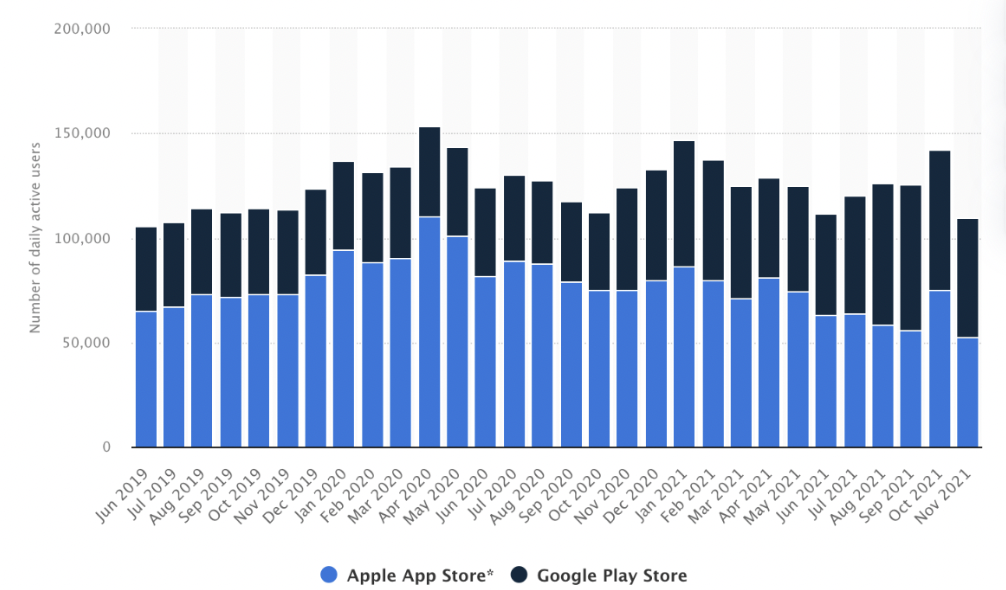

**Second: Peak, stabelize and Recovery Dates Estimates**

We were not able to find a daily level external data that would be a direct proxy for snapchat behavioral trend after covid-19 lock down, yet we though that our trend  might follow the trend profile of power usage data which would reflect daily life style routine changes, the data for nordic counties showed that the power usage trend peaked around April 11th to 13th, stabilized for a couple of weeks and reached full recovery to normal trend by the first week of June.
fig2 is showing the power usage trend sample in Norway collected from a trusted governmental website report: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8647432/

*Daily power consumption in Norway*

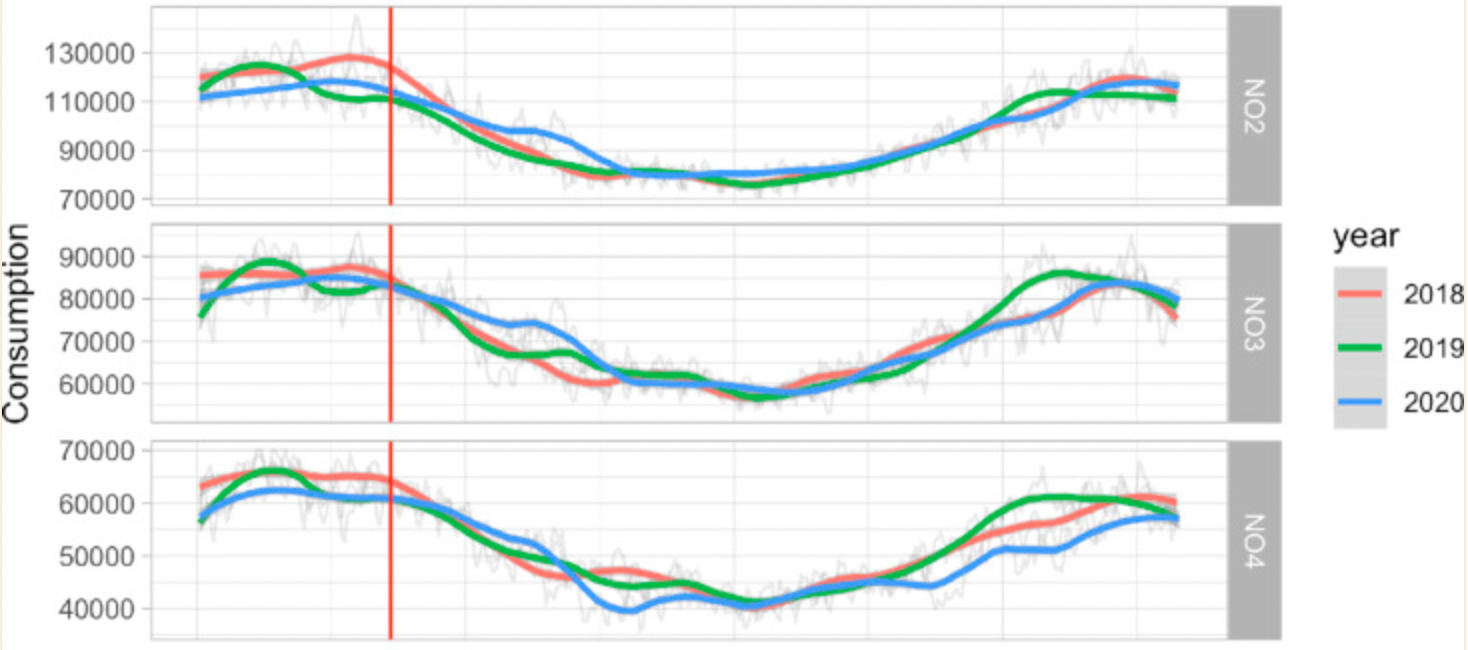

## Model Design and Results

In [158]:
#####  prophet model2 preparation

# preparing training data
train_data = snap.groupby('event_date')['APP_APPLICATION_OPEN_UU'].sum().reset_index().rename(columns={'event_date': 'ds', 'APP_APPLICATION_OPEN_UU': 'y'})
train_data['ds'] = pd.to_datetime(train_data['ds'])

# pre and post covid seasonality
train_data = train_data.copy()
train_data['pre_covid'] = (pd.to_datetime(train_data['ds']) >= pd.to_datetime('2020-03-13')) & (pd.to_datetime(train_data['ds']) <= pd.to_datetime('2020-04-10'))
train_data['post_covid'] = ~train_data['pre_covid']

# lockdown period to be treated as holidays
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-13', 'lower_window': 0, 'ds_upper': '2020-04-10'}])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days

In [165]:
##### Model2
# Select certain number of historical days to use for training
#train_data = train_data[train_data['ds'] > train_data['ds'].max() - pd.Timedelta(days=40)]

# design model
m2 = Prophet(
   changepoint_prior_scale=0.4,
   n_changepoints=12,
   seasonality_prior_scale = 1,
   holidays = lockdowns,
  yearly_seasonality= True,
 #  seasonality_mode = 'multiplicative',
#  changepoints=['2020-03-13'],
#  weekly_seasonality=False,
)
m2.add_seasonality(name='weekly_pre_covid', period=7, fourier_order=3, condition_name='pre_covid',)
m2.add_seasonality(name='weekly_post_covid',period=7,fourier_order=3,condition_name='post_covid',)

# fit model
m2 = m2.fit(train_data)
future2 = m2.make_future_dataframe(periods=101)
future2['pre_covid'] = (pd.to_datetime(future2['ds']) >= pd.to_datetime('2020-03-13')) & (pd.to_datetime(future2['ds']) <= pd.to_datetime('2020-04-10'))
future2['post_covid'] = ~future2['pre_covid']

# predict
forecast2 = m2.predict(future2)

# forecast plot
plot_plotly(m2, forecast2)

#plot_components_plotly(m2, forecast2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [166]:
##### Q2 DAU Forecast

# Q2 forecasted 
start_date = '2020-04-01'
end_date = '2020-06-30'
forecast2.set_index('ds', inplace=True)
Q2_forecasted = forecast2.loc[start_date:end_date, 'yhat'].sum()
Q2_forecasted

Q2_Avg_DAU = Q2_forecasted / 91
Q2_Avg_DAU


7292072.439086807

In [167]:
(7292072.439086807-6922287.542834127)/6922287.542834127

0.05341946487552034

# Question 3: In what ways is COVID impacting engagement on Snapchat?

In [ ]:
path='/content/drive/MyDrive/AWS_Final_Project/snap_engagement.csv'
df = pd.read_csv(path)


In [ ]:
# visualization with boxplot before and after covid, separated by age group? pre covid vs post covid. Male and female as well. 

# Old work (Delete Later)

In [ ]:
############ Model1
# Select certain number of historical days to use for training
#train_data = train_data[train_data['ds'] > train_data['ds'].max() - pd.Timedelta(days=40)]

# design model
m1 = Prophet(
   changepoint_prior_scale=0.4,
   n_changepoints=12,
   seasonality_prior_scale = 0.2,
   holidays = lockdowns,
   yearly_seasonality= True,
#  changepoints=['2020-03-13'],
#  weekly_seasonality=False,
)
m1.add_seasonality(name='weekly_pre_covid', period=7, fourier_order=3, condition_name='pre_covid',)
m1.add_seasonality(name='weekly_post_covid',period=7,fourier_order=3,condition_name='post_covid',)

# fit model
m1 = m1.fit(train_data)
future1 = m1.make_future_dataframe(periods=101)
future1['pre_covid'] = pd.to_datetime(future1['ds']) < pd.to_datetime('2020-03-13')
future1['post_covid'] = ~future1['pre_covid']

# predict
forecast1 = m1.predict(future1)

# forecast plot
plot_plotly(m1, forecast1)

#plot_components_plotly(m1, forecast1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
train_data = snap.groupby('event_date')['APP_APPLICATION_OPEN_UU'].sum().reset_index().rename(columns={'event_date': 'ds', 'APP_APPLICATION_OPEN_UU': 'y'})
train_data['ds'] = pd.to_datetime(train_data['ds'])

# lockdown period
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-13', 'lower_window': -15, 'upper_window': 0}
])
for t_col in ['ds']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])

# forecast model
m1 = Prophet(changepoint_prior_scale=0.01,
             seasonality_prior_scale=0.8,
             holidays=lockdowns,
             weekly_seasonality=False)

# Add a weekly seasonality component for the last 9 days of data
train_data['last_9_days'] = (train_data['ds'] >= train_data['ds'].max() - pd.Timedelta(days=9)).astype(int)
m1.add_seasonality(
    name='weekly_last_9_days',
    period=7,
    fourier_order=3,
    condition_name='last_9_days',
)

# fit model
m1 = m1.fit(train_data)

# make future dataframe
future1 = m1.make_future_dataframe(periods=101)

# Add a column for the last 9 days of data to the future dataframe
future1['last_9_days'] = (future1['ds'] >= train_data['ds'].max() - pd.Timedelta(days=9)).astype(int)

# predict
forecast1 = m1.predict(future1)

# forecast plot
plot_plotly(m1, forecast1)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
train_data

,ds,y,pre_covid,post_covid
0,2019-01-01,7012787,True,False
1,2019-01-02,6522305,True,False
2,2019-01-03,6457837,True,False
3,2019-01-04,6529505,True,False
4,2019-01-05,6650731,True,False
...,...,...,...,...
441,2020-03-17,7110274,False,True
442,2020-03-18,7128569,False,True
443,2020-03-19,7167179,False,True
444,2020-03-20,7237818,False,True


In [ ]:
lockdowns

,holiday,ds,lower_window,ds_upper,upper_window
0,lockdown_1,2020-03-13,0,2020-05-29,77


In [ ]:

m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)
m.train_holiday_names


###

# generate the forecast for the next 9 days
future_dates = pd.date_range(start=train_data['ds'].max()+pd.Timedelta(days=1), periods=90, freq='D')
future_data = pd.DataFrame({'ds': future_dates})

forecast = model.predict(future_data)['yhat'].values

# create a new DataFrame with the forecasted values
forecast_df1 = pd.DataFrame({'event_date': future_dates, 'APP_APPLICATION_OPEN_UU': forecast})
forecast_df1['event_date'] = forecast_df1['event_date'].apply(lambda x: x.date().strftime('%Y-%m-%d'))


In [ ]:

snapF = pd.concat([snapA, forecast_df1], ignore_index=True)


In [ ]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=snapF['event_date'], y=snapF['APP_APPLICATION_OPEN_UU'], mode='lines', name='APP_APPLICATION_OPEN_UU'))
fig.update_layout(title='Forecasted Usage', xaxis_title='Date', yaxis_title='DAY')
fig.update_traces(hoverinfo='text', hovertext=[f"event_date: {date}<br>APP_APPLICATION_OPEN_UU: {APP_APPLICATION_OPEN_UU:.2f}" for date, APP_APPLICATION_OPEN_UU in zip(snapAF['event_date'], snapAF['APP_APPLICATION_OPEN_UU'])])
fig.show()

In [ ]:
!pip install rpy2
%load_ext rpy2.ipython


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


train_data = snap.groupby('event_date')['APP_APPLICATION_OPEN_UU'].sum().reset_index().rename(columns={'event_date': 'date', 'APP_APPLICATION_OPEN_UU': 'usage'})
train_data['date'] = pd.to_datetime(train_data['date'])

# Select the last 14 days of data
train_data = train_data[train_data['date'] > train_data['date'].max() - pd.Timedelta(days=120)]

# fit an ARIMA model to the training data
model = ARIMA(train_data.set_index('date'), order=(1, 1, 0))
model_fit = model.fit()

# generate the forecast for the next 9 days
future_dates = pd.date_range(start=train_data['date'].max()+pd.Timedelta(days=1), periods=9, freq='D')
forecast = model_fit.forecast(steps=9)[0]

# create a new DataFrame with the forecasted values
forecast_df1 = pd.DataFrame({'event_date': future_dates, 'APP_APPLICATION_OPEN_UU': forecast})
forecast_df1['event_date'] = forecast_df1['event_date'].apply(lambda x: x.date().strftime('%Y-%m-%d'))





/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

